# Introduction
<a id="0"></a>

- This is a Web Scraping and data analysis project for Airbnb listing. The data was scraped from website: https://www.airbnb.com/ using BeautifulSoup and requests. The raw data was compiled, and data cleaning was performed to generate meaningful data frame using pandas. The clean dataset will then analyzed using numpy, matplotlib and seaborn. Below is the series of questions asking during data analysis

1. [What Room type has highest price in MYR (Overall and per guest) ?](#1) 
2. [Did wifi, air-cond, kitchen or self-check bring impact to the price ?](#2)
    - [wifi](#3)
    - [air-cond](#4)
    - [kitchen](#5)
    - [Self-check in](#6)
    
3. [Bed type, Number of bed and price relationship](#8)
4. [Did number of bath bring impact to the price ?](#9)
5. [Correlation between rating and price](#7)

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Compilation

### Import listings files

In [2]:
directory = '/Users/Asus/Desktop/Unity Game/python/Data_Analysis/WebScrapping/Abnb/Scraping_lists'

df = pd.DataFrame()
for file in os.listdir(directory):
    df = df.append((pd.read_csv(os.path.join(directory, file))), ignore_index=True)

### FIrst glance of data

In [3]:
df.to_csv('/Users/Asus/Desktop/Unity Game/python/Data_Analysis/WebScrapping/Abnb/dataset_full.csv', index=False)
df.head()

,Room type,Name,Descriptions,Rating,Price
0,Entire serviced apartment in Kuala Lumpur,LUXURY Studio with NETFLIX & SKY POOL at CEYLONZ,"4 guests, Studio, 1 bed, 1 bath, Wifi, Air con...",4.86,$19 per night
1,Entire serviced apartment in Kuala Lumpur,★Studio★KL★JLN TUN RAZAK★10min KLCC★IJN★TV Box★,"2 guests, Studio, 1 bed, 1 bath, Wifi, Air con...",4.77,$26 per night
2,Entire rental unit in Kuala Lumpur,Staycation for Fully Vaccinated Guest. KLCC area,"2 guests, 1 bedroom, 1 bed, 1 bath, Wifi, Air ...",4.95,$35 per night
3,Entire serviced apartment in Kuala Lumpur,"350M TO KLCC,VORTEX HIGH FLOOR KLCC VIEW@BLACK...","6 guests, 3 bedrooms, 3 beds, 2 baths, Wifi, A...",NaN,$11 per night
4,Hotel room in Kuala Lumpur,Superior Queen Room,"2 guests, 1 bedroom, 1 bed, 1 private bath, Wi...",4.51,$13 per night


Based on data, we can extract and generate new features as shown below:

    Original Columns    New Columns
  1. Room type.............Room(type) & Location
  2. Description...........Number of guests, Bed type, number of bed, number of bath, wifi, Air-cond, Kitchen and Self check-in
  3. Rating................(unchange)
  4. Price.................Price_in_MYR

# Data Cleaning

### Checking null value in all columns, and drop the row

In [4]:
# checking null row
df[df.isnull().any(axis=1)]
# drop null price row / drop all null values in row
df.dropna(how='all', inplace=True)

### Remove duplicate row

In [5]:
# remove duplicate row
duplicate = df[df['Name'].duplicated(keep=False)]
df.drop_duplicates(keep='first', inplace=True)
df = df.reset_index()

### Checking row number and Null/ empty row again

In [6]:
print(f'Length of row {len(df)}, number of null:\n{df.isnull().sum()}')

Length of row 273, number of null:
index            0
Room type        0
Name             0
Descriptions     0
Rating          16
Price            0
dtype: int64


### New features -  Location
- to identify listing area

In [7]:
df['Room type'] = df['Room type'].str.replace(' in ', ',')
df['Location'] = df['Room type'].apply(lambda x: str(x).split(',')[-1])
df['Location'] = df['Location'].str.strip()
df.Location.value_counts()

Kuala Lumpur                         193
Petaling Jaya                         12
Federal Territory of Kuala Lumpur      9
Bukit Bintang                          7
Cheras                                 7
Cyberjaya                              7
Balakong                               5
Kuala Kubu Baru                        4
Shah Alam                              4
Batu 9 Cheras                          3
Selangor                               3
Seri Kembangan                         2
Hulu Langat                            2
KUALA LUMPUR                           1
Melaka                                 1
Sungai Buloh                           1
Serendah                               1
Sepang                                 1
i-City                                 1
Damansara Perdana                      1
Kampung Baru                           1
Kuala Selangor                         1
Tanjong Sepat                          1
Rawang                                 1
Batang Kali     

### New features -  Room
- to remove location, keep only room type info

In [8]:
df['Room'] = df['Room type'].apply(lambda x : x.split(',')[0])
df.Room.value_counts()

Entire rental unit            102
Entire condominium (condo)     87
Entire serviced apartment      49
Entire loft                     9
Entire villa                    6
Entire residential home         6
Private room                    2
Hotel room                      2
Entire bungalow                 2
Entire guesthouse               2
Entire townhouse                1
Entire cottage                  1
Entire apartment                1
Farm stay                       1
Hut                             1
Room                            1
Name: Room, dtype: int64

### New features - Number of Guests

In [9]:
for idx, guests in enumerate(df.Descriptions):
    for guest in guests.split(','):
        if 'guest' in guest:
            guest = guest.split(' ')
            df.loc[idx, 'Number_of_guest'] = guest[0]
            break
df.Number_of_guest = df.Number_of_guest.astype('int64')
df.Number_of_guest.value_counts()

4     90
2     88
3     45
5     14
6     12
10     9
16     7
8      3
7      2
14     1
12     1
1      1
Name: Number_of_guest, dtype: int64

### New features - Bed type

In [10]:
df['bed_type'] = [type.split(',')[1] for type in df.Descriptions]
df.bed_type.value_counts()

 1 bedroom     125
 Studio        116
 3 bedrooms     10
 2 bedrooms     10
 4 bedrooms      7
 6 bedrooms      2
 5 bedrooms      2
 8 bedrooms      1
Name: bed_type, dtype: int64

### New features - Number of bed

In [11]:
for idx, beds in enumerate(df.Descriptions):
    for bed in beds.split(',')[2:]:
        if 'bed' in bed:
            bed = bed.split(' ')
            df.loc[idx, 'Number_of_bed'] = bed[1]
            break
            
df.Number_of_bed = df.Number_of_bed.astype('float64')
df.Number_of_bed.value_counts()

1.0     178
2.0      48
3.0      13
4.0       9
5.0       5
12.0      4
0.0       4
10.0      2
7.0       2
6.0       2
8.0       2
20.0      1
18.0      1
Name: Number_of_bed, dtype: int64

### New features - Number of bath

In [12]:
for idx, baths in enumerate(df.Descriptions):
    for bath in baths.split(',')[2:]:
        if 'bath' in bath:
            bath = bath.split(' ')
            df.loc[idx, 'Number_of_bath'] = bath[1]
            break
df.Number_of_bath.value_counts()

1            200
1.5           32
2             20
3              8
4              2
Half-bath      2
5              2
4.5            2
2.5            2
8              1
7              1
6              1
Name: Number_of_bath, dtype: int64

### New features - Wifi, Air Cond, Kitchen, Self Check-in

In [13]:
df['wifi'] = [True if 'Wifi' in wifi else False for wifi in df.Descriptions]
df['Air_cond'] = [True if 'Air conditioning' in ac else False for ac in df.Descriptions]
df['Kitchen'] = [True if 'Kitchen' in Kitchen else False for Kitchen in df.Descriptions]
df['Self_check_in'] = [True if 'Self check-in' in sci else False for sci in df.Descriptions]

### New features - Price in MYR

In [14]:
us_to_myr = 4.5

df['Price_in_MYR'] = df.Price.apply(lambda x: int(x.split(' ')[0].replace('$', '')) * us_to_myr)
# to double confirm if every listing is per night
unit_price = df.Price.apply(lambda x: ' '.join(x.split(' ')[1:]))
unit_price.value_counts()

per night    273
Name: Price, dtype: int64

### New features - Price in MYR per guest

In [15]:
df['Price_in_MYR_per_guest'] = df['Price_in_MYR'] / df['Number_of_guest']
df[['Price_in_MYR', 'Number_of_guest', 'Price_in_MYR_per_guest']].head()

,Price_in_MYR,Number_of_guest,Price_in_MYR_per_guest
0,85.5,4,21.375
1,117.0,2,58.500
2,157.5,2,78.750
3,49.5,6,8.250
4,58.5,2,29.250


### New dataset after cleaning

In [16]:
useful_features = ['Location', 'Room', 'Number_of_guest', 'bed_type', 'Number_of_bed', 'Number_of_bath', 'wifi', 'Air_cond', 'Kitchen', 'Self_check_in', 'Rating', 'Price_in_MYR', 'Price_in_MYR_per_guest']
data = df[useful_features]
data.to_csv('/Users/Asus/Desktop/Unity Game/python/Data_Analysis/WebScrapping/Abnb/dataset_afterClean.csv', index=False)
data.head()

,Location,Room,Number_of_guest,bed_type,Number_of_bed,Number_of_bath,wifi,Air_cond,Kitchen,Self_check_in,Rating,Price_in_MYR,Price_in_MYR_per_guest
0,Kuala Lumpur,Entire serviced apartment,4,Studio,1.0,1,True,True,True,True,4.86,85.5,21.375
1,Kuala Lumpur,Entire serviced apartment,2,Studio,1.0,1,True,True,True,False,4.77,117.0,58.500
2,Kuala Lumpur,Entire rental unit,2,1 bedroom,1.0,1,True,True,True,True,4.95,157.5,78.750
3,Kuala Lumpur,Entire serviced apartment,6,3 bedrooms,3.0,2,True,True,True,False,NaN,49.5,8.250
4,Kuala Lumpur,Hotel room,2,1 bedroom,1.0,1,True,True,False,True,4.51,58.5,29.250


# Data Analysis

<a id="1"></a>
### 1. What Room type has highest price in MYR ?

[back to top](#0)

#### Overall
- Regardless of number of guest in one room

In [46]:
highest_room_price = data.groupby('Room').agg({'Price_in_MYR': ['median', 'mean', 'max', 'min','count']})
highest_room_price_sort = highest_room_price.Price_in_MYR.sort_values(by='median', ascending=False)
print('Top 5 expansive room (median, mean, max, min and count)')
highest_room_price_sort.head()

Top 5 expansive room (median, mean, max, min and count)


,median,mean,max,min,count
Room,,,,,
Farm stay,1849.5,1849.5,1849.5,1849.5,1
Entire villa,1201.5,1405.5,2826.0,787.5,6
Hut,1143.0,1143.0,1143.0,1143.0,1
Entire cottage,886.5,886.5,886.5,886.5,1
Entire townhouse,805.5,805.5,805.5,805.5,1


Room type follow by price


Text(0.5, 0, 'median price in MYR')

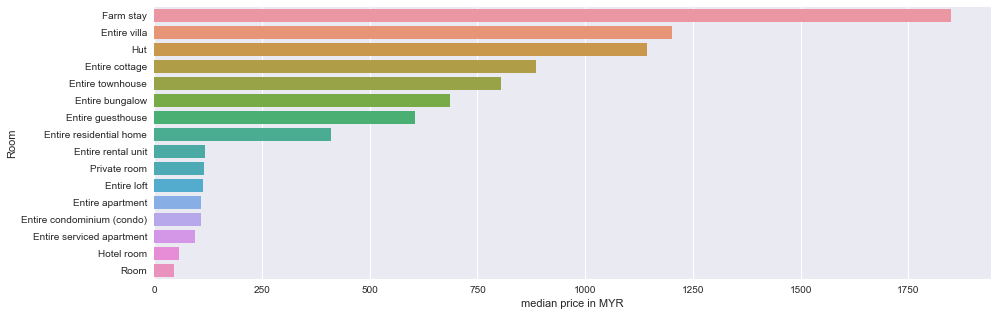

In [47]:
print('Room type follow by price')
room = highest_room_price_sort.index
plt.figure(figsize=(15, 5))
sns.barplot(data=highest_room_price_sort, y=room, x='median')
plt.xlabel('median price in MYR')

Room price pie chart


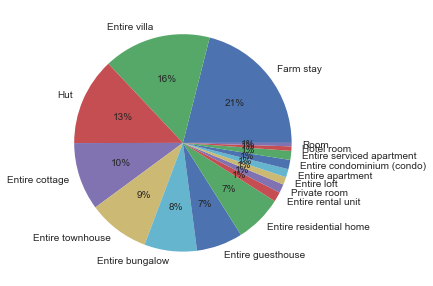

In [48]:
print('Room price pie chart')
plt.figure(figsize=(5, 5))
plt.pie(data=highest_room_price_sort, x='mean', labels=room, autopct='%.0f%%')
plt.show()

In [51]:
print('Room versue number of guests')
data.groupby('Room').agg('median')[['Number_of_guest', 'Price_in_MYR']].sort_values(by='Number_of_guest', ascending=False)

Room versue number of guests


,Number_of_guest,Price_in_MYR
Room,,
Hut,16.0,1143.00
Entire bungalow,15.0,686.25
Entire cottage,12.0,886.50
Entire residential home,10.0,409.50
Entire townhouse,10.0,805.50
Entire villa,10.0,1201.50
Entire guesthouse,9.5,605.25
Farm stay,8.0,1849.50
Entire loft,4.0,112.50


- No suprise to see, the room with more number of guest are more expansive than those room with fewer guests

#### per guest
- Next step, we want to see if we calculate room price per guest, will the result be different?

In [21]:
highest_room_price_per_guest = data.groupby('Room').agg(['median', 'mean', 'max', 'min', 'count'])[['Price_in_MYR_per_guest']]
highest_room_price_per_guest_sorted = highest_room_price_per_guest.Price_in_MYR_per_guest.sort_values(by='median', ascending=False)
highest_room_price_per_guest_sorted.head()

,median,mean,max,min,count
Room,,,,,
Farm stay,231.187500,231.187500,231.1875,231.18750,1
Entire villa,136.339286,131.537054,176.6250,71.71875,6
Entire townhouse,80.550000,80.550000,80.5500,80.55000,1
Entire cottage,73.875000,73.875000,73.8750,73.87500,1
Hut,71.437500,71.437500,71.4375,71.43750,1


In [22]:
highest_room_price_per_guest_sorted.index

Index(['Farm stay', 'Entire villa', 'Entire townhouse', 'Entire cottage',
       'Hut', 'Private room', 'Entire apartment', 'Entire bungalow',
       'Entire guesthouse', 'Room', 'Entire residential home',
       'Entire condominium (condo)', 'Entire serviced apartment',
       'Entire rental unit', 'Hotel room', 'Entire loft'],
      dtype='object', name='Room')

Text(0.5, 0, 'median price in MYR per guest')

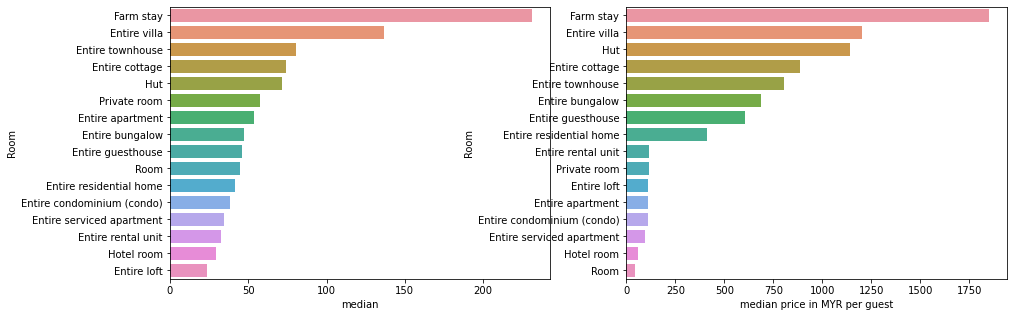

In [23]:
room_per_guest = highest_room_price_per_guest_sorted.index

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
# plt.figure(figsize=(15, 5))
sns.barplot(data=highest_room_price_per_guest_sorted, y=room_per_guest, x='median', ax=ax[0])
sns.barplot(data=highest_room_price_sort, y=room, x='median', ax=ax[1])
plt.xlabel('median price in MYR per guest')

- From the comparison of overall's and per guest's room price, still our top 5 expensive room are Farm stay, Entire villa, Entire townhouse, Entire cottage and Hut.

<a id="2"></a>
### 2. Did wifi, air-cond, kitchen or self-check in bring impact the price ?

[back to top](#0)

#### Wifi vs price <a id="3"></a>

In [24]:
data.groupby('wifi').agg(['mean', 'median', 'max', 'min', 'count'])[['Price_in_MYR']]

Price_in_MYR                           
              mean median     max   min count
wifi                                         
False    695.25000  661.5  1849.5  54.0    12
True     159.37931  112.5  2826.0  45.0   261

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'No wifi')

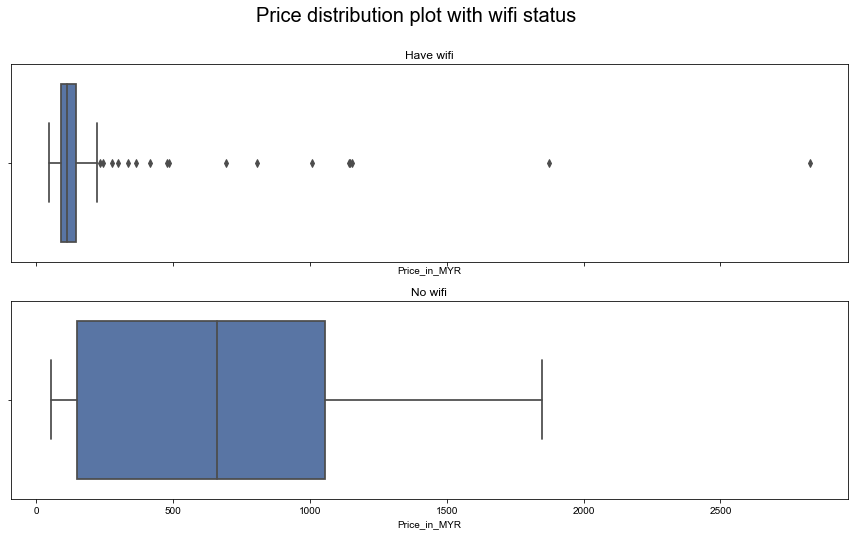

In [25]:
fig, ax = plt.subplots(2, 1, figsize=(15, 8), sharex=True)
fig.suptitle('Price distribution plot with wifi status', fontsize=20)
plt.style.use('seaborn')

sns.boxplot(data[df.wifi==True].Price_in_MYR, ax=ax[0])
sns.boxplot(data[df.wifi==False].Price_in_MYR, ax=ax[1])
ax[0].set_title('Have wifi')
ax[1].set_title('No wifi')

In [26]:
table_wifi = data[data.wifi == False][['Room', 'wifi', 'Price_in_MYR']].sort_values(by='Price_in_MYR', ascending=False)
table_wifi.style.set_table_attributes("style='display:inline'").set_caption('Table for room do not have wifi')

,Room,wifi,Price_in_MYR
214,Farm stay,False,1849.500000
241,Entire villa,False,1426.500000
139,Entire villa,False,1255.500000
189,Entire villa,False,990.000000
271,Entire cottage,False,886.500000
151,Entire villa,False,787.500000
208,Entire residential home,False,535.500000
219,Entire residential home,False,216.000000
270,Entire serviced apartment,False,171.000000
5,Entire serviced apartment,False,85.500000


- Suprise to see room with no wifi has highest price compare to has wifi. However, from data show, most of the cheap room types provide wifi, with only few room types (especially expansive room type (Entira villa, Farm stay)) did not provide wifi, causing wider distribution and higher mean and median.  

#### air-cond vs price <a id="4"></a>

In [27]:
print(f'% in dataset having air-cond: {data.Air_cond.sum() / len(data) *100}%')

% in dataset having air-cond: 98.9010989010989%


In [28]:
room_no_ac = data[data.Air_cond == False][['Location', 'Room', 'Air_cond', 'Price_in_MYR']]
room_no_ac.style.set_table_attributes("style='display:inline'").set_caption('Room which do not have air-cond')

,Location,Room,Air_cond,Price_in_MYR
214,Hulu Langat,Farm stay,False,1849.500000
238,Selangor,Entire guesthouse,False,58.500000
271,Lenggeng,Entire cottage,False,886.500000


In [29]:
table_ac = data.groupby('Air_cond').agg({'Price_in_MYR':'mean'})
table_ac.style.set_table_attributes("style='display:inline'").set_caption('Table for room do not have Air-cond')

,Price_in_MYR
Air_cond,
False,931.500000
True,174.616667


- Most of the room provided air-conditioning facilities (up to 99%). Again, most expansive room type (Farm stay) will shift the entire distribution to higher price.

#### kitchen vs price <a id="5"></a>

In [30]:
data.groupby('Kitchen').agg(['mean', 'median', 'max', 'count'])[['Price_in_MYR']]

Price_in_MYR                     
                mean median     max count
Kitchen                                  
False      87.333333   85.5   171.0    27
True      193.426829  117.0  2826.0   246

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'No kitchen provided')

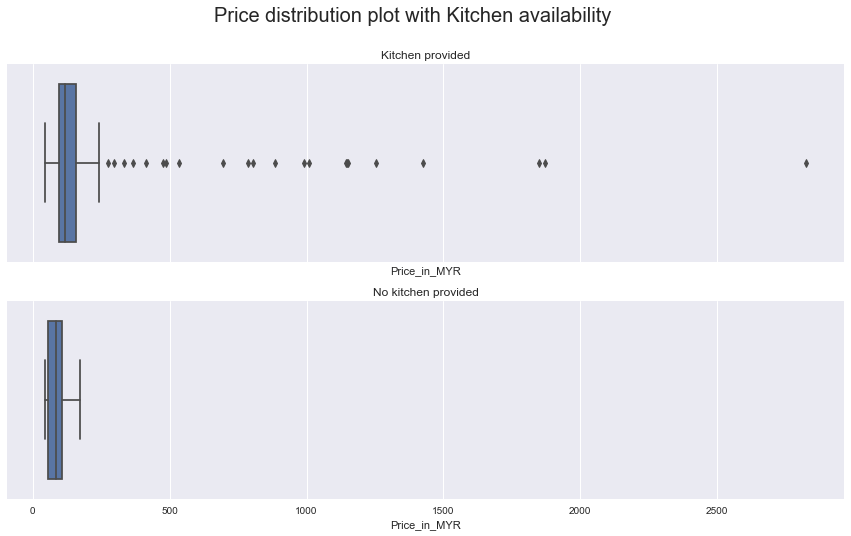

In [31]:
fig, ax = plt.subplots(2, 1, figsize=(15, 8), sharex=True)
fig.suptitle('Price distribution plot with Kitchen availability', fontsize=20)
plt.style.use('seaborn')

sns.boxplot(data[df.Kitchen==True].Price_in_MYR, ax=ax[0])
sns.boxplot(data[df.Kitchen==False].Price_in_MYR, ax=ax[1])
ax[0].set_title('Kitchen provided')
ax[1].set_title('No kitchen provided')

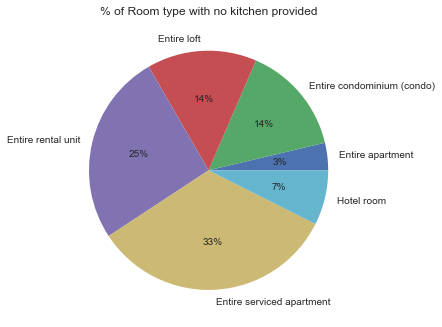

In [32]:
room_with_no_kitchen = data[data.Kitchen==False].groupby('Room').Location.count()

plt.pie(data=room_with_no_kitchen, labels=room_with_no_kitchen.index, x=room_with_no_kitchen.values, autopct='%d%%')
plt.title('% of Room type with no kitchen provided')
plt.show()

- The room type with no kitchen provided are all the room type with RM120 (median price) per night and below, in other word, room with kitchen genarally higher price than room with no kitchen.

#### self-check in vs price <a id="6"></a>

In [33]:
data.groupby('Self_check_in').agg(['mean', 'median', 'max', 'min', 'count'])[['Price_in_MYR']]

Price_in_MYR                           
                      mean median     max   min count
Self_check_in                                        
False           232.262658  117.0  2826.0  45.0   158
True            115.160870  108.0   220.5  45.0   115

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'No Self_check_in provided')

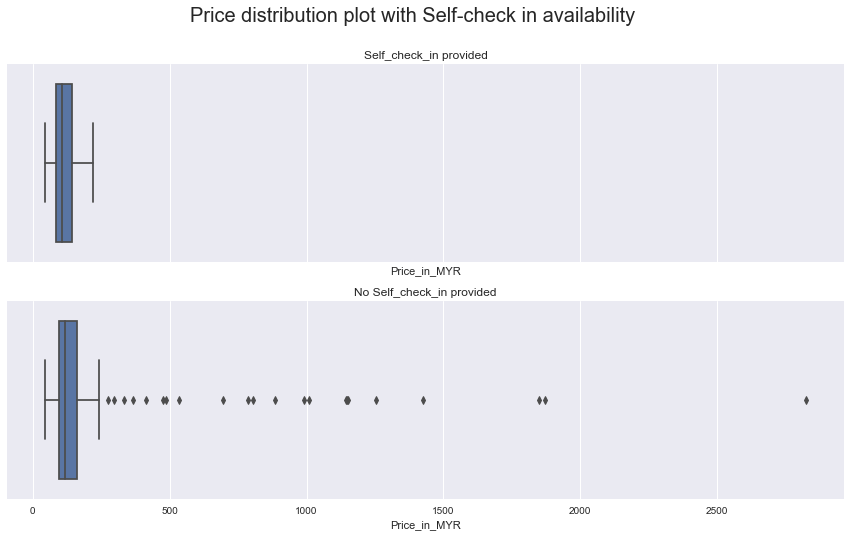

In [34]:
fig, ax = plt.subplots(2, 1, figsize=(15, 8), sharex=True)
fig.suptitle('Price distribution plot with Self-check in availability', fontsize=20)
plt.style.use('seaborn')

sns.boxplot(data[df.Self_check_in==True].Price_in_MYR, ax=ax[0])
sns.boxplot(data[df.Self_check_in==False].Price_in_MYR, ax=ax[1])
ax[0].set_title('Self_check_in provided')
ax[1].set_title('No Self_check_in provided')

In [35]:
data[data.Self_check_in == False][['Room', 'Price_in_MYR']].sort_values(by='Price_in_MYR', ascending=False).iloc[:5]

,Room,Price_in_MYR
168,Entire villa,2826.0
262,Entire residential home,1872.0
214,Farm stay,1849.5
241,Entire villa,1426.5
139,Entire villa,1255.5


 -  Most expansive room does not provide self check in. As looking from distribution plot above, the median for both are quite similar.

Text(0.5, 1.0, 'Correlation graph')

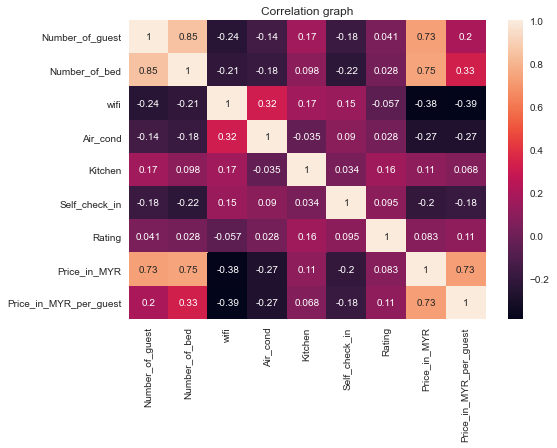

In [36]:
sns.heatmap(data.corr(), annot=True)
plt.title('Correlation graph')

- This correlation graph has prove my finding is correct as wifi, air-cond and self-check in did not bring significant impact to price but kitchen. 

<a id="8"></a>
### 3. Bed type, Number of bed and price relationship
[back to top](#0)

In [37]:
print('Relatioship of Bed type and number of bed')
data.groupby('bed_type').agg(['median', 'max', 'min', 'count'])['Number_of_bed'].sort_values(by='median', ascending=False)

Relatioship of Bed type and number of bed


,median,max,min,count
bed_type,,,,
6 bedrooms,15.0,18.0,12.0,2
8 bedrooms,12.0,12.0,12.0,1
5 bedrooms,10.0,12.0,8.0,2
4 bedrooms,7.0,20.0,0.0,7
3 bedrooms,4.5,8.0,3.0,10
2 bedrooms,3.0,12.0,2.0,10
1 bedroom,1.0,4.0,0.0,123
Studio,1.0,4.0,0.0,116


Relatioship of Bed type and number of bed (graph)


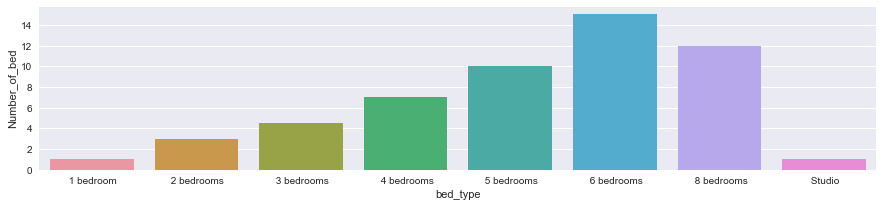

In [38]:
bed_count = data.groupby('bed_type').agg('median')[['Number_of_bed']].reset_index()
plt.figure(figsize=(15,3))
sns.barplot(x=bed_count.bed_type, y=bed_count.Number_of_bed)
print('Relatioship of Bed type and number of bed (graph)')

In [39]:
 print('Relatioship of Bed type and price in MYR')
data.groupby('bed_type').agg(['median', 'mean', 'max', 'min', 'count'])['Price_in_MYR'].sort_values(by='median', ascending=False)

Relatioship of Bed type and price in MYR


,median,mean,max,min,count
bed_type,,,,,
8 bedrooms,2826.00,2826.000000,2826.0,2826.0,1
6 bedrooms,1102.50,1102.500000,1872.0,333.0,2
5 bedrooms,1077.75,1077.750000,1147.5,1008.0,2
4 bedrooms,535.50,678.857143,1152.0,216.0,7
3 bedrooms,243.00,373.050000,1255.5,49.5,10
2 bedrooms,227.25,521.100000,1426.5,139.5,10
1 bedroom,112.50,116.820000,297.0,45.0,125
Studio,103.50,124.642241,1849.5,54.0,116


Relatioship of Bed type and price in MYR (graph)


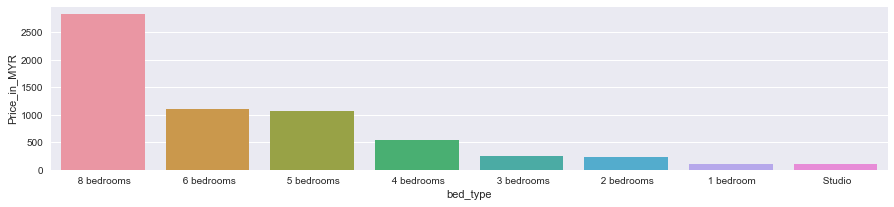

In [40]:
bed_price = data.groupby('bed_type').agg('median')[['Price_in_MYR']].sort_values(by='Price_in_MYR', ascending=False).reset_index()
plt.figure(figsize=(15, 3))
sns.barplot(x=bed_price.bed_type, y=bed_price.Price_in_MYR)
print('Relatioship of Bed type and price in MYR (graph)')

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 36.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 48.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Swarm plot for bed type and price


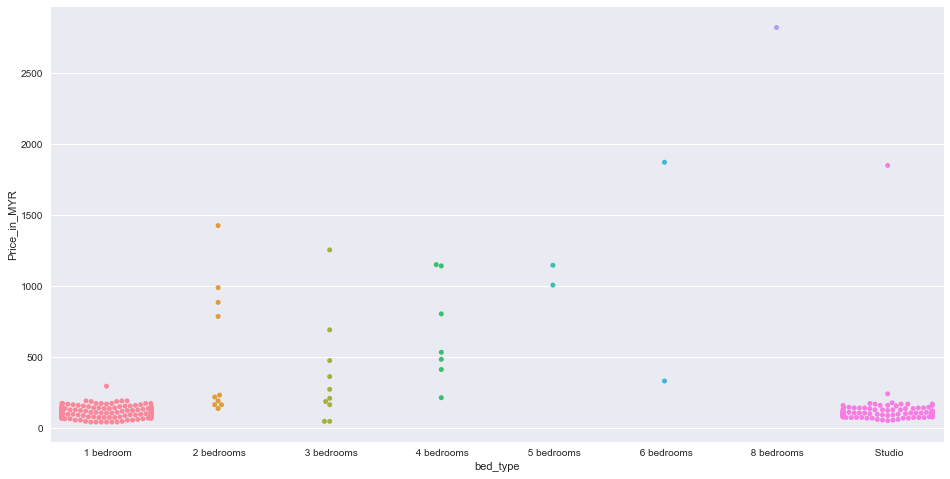

In [41]:
plt.figure(figsize=(16, 8))
sns.swarmplot(x=data.bed_type.sort_values(), y=data.Price_in_MYR)
print('Swarm plot for bed type and price')

- Strong correlation between bed type (directly proportional relationship with number of bed) and room price.
- The room price for 1 bedroom type and studio are more consistence

<a id="9"></a>
### 4. Did number of bath bring impact to the price ?
[back to top](#0)

Swarm plot for Number of bath and price


C:\Users\Asus\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 75.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


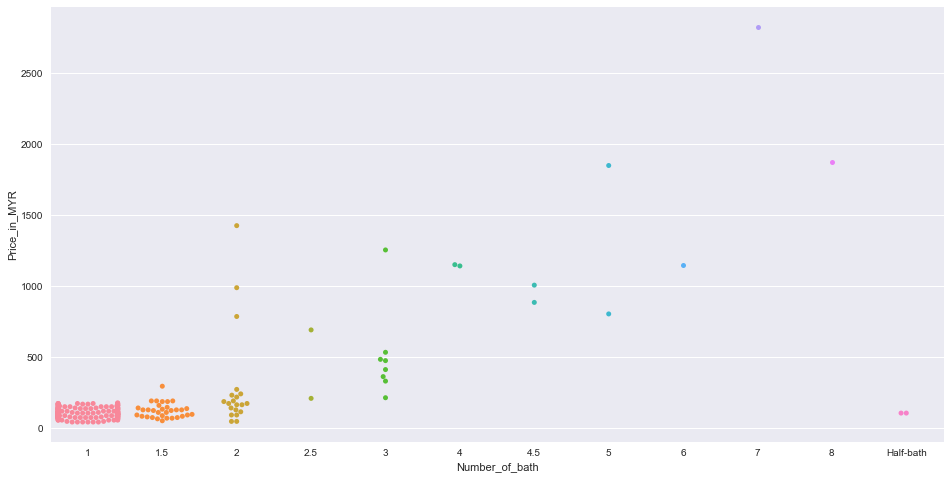

In [42]:
plt.figure(figsize=(16, 8))
sns.swarmplot(x=data.Number_of_bath.sort_values(), y=data.Price_in_MYR)
print('Swarm plot for Number of bath and price')

Relatioship of Number_of_bath and price in MYR (graph)


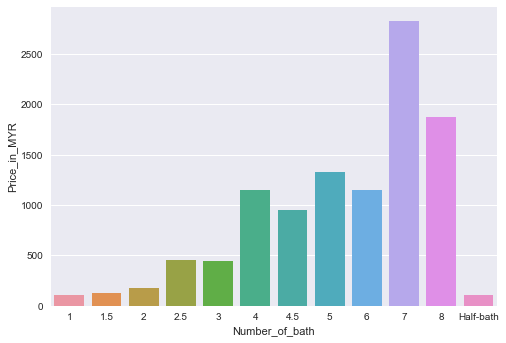

In [43]:
bath = data.groupby('Number_of_bath').agg('median')['Price_in_MYR'].reset_index()
sns.barplot(data=bath, x='Number_of_bath', y='Price_in_MYR')
print('Relatioship of Number_of_bath and price in MYR (graph)')

- Strong correlation between number of bath and room price.

<a id="7"></a>
### 5. Correlation between rating and price
[back to top](#0)

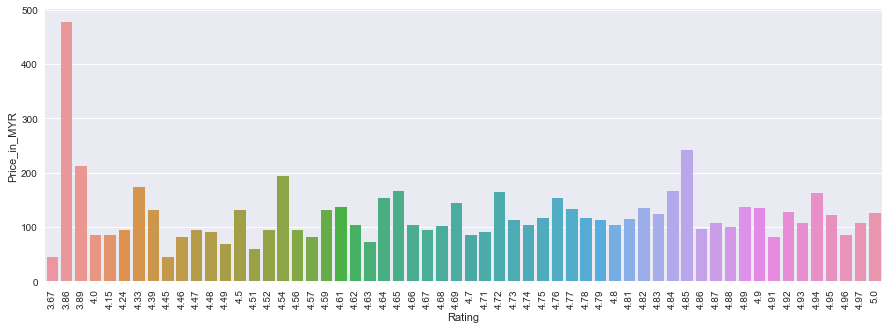

In [44]:
rating_price = data.groupby('Rating').agg('median')[['Price_in_MYR']]
plt.figure(figsize=(15,5))
sns.barplot(x=rating_price.index, y=rating_price.Price_in_MYR)
plt.xticks(rotation='vertical')
plt.show()

- Rating vs price in expansive room type (price higher than RM600 per night (mean price))

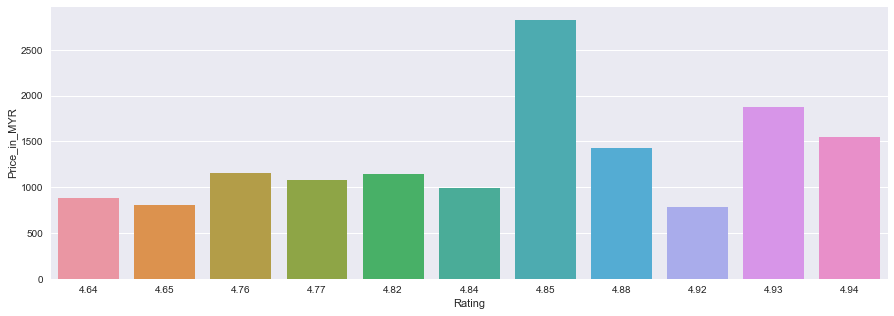

In [45]:
expensive_room_rating = data[data.Price_in_MYR > 600].groupby('Rating').agg('mean')[['Price_in_MYR']]
plt.figure(figsize=(15,5))
sns.barplot(x=expensive_room_rating.index, y=expensive_room_rating.Price_in_MYR)
plt.show()

- to be continue